Simulation Results (Example: 30-year-old Japanese woman):
Day 1: Weight = 55.00 kg, Calorie Intake = 2006 kcal, Steps = 6130, Exercise Duration = 21 min, Activity Factor = 1.69, TDEE = 2020 kcal, Calorie Balance = -14 kcal
Day 2: Weight = 54.99 kg, Calorie Intake = 1842 kcal, Steps = 2960, Exercise Duration = 22 min, Activity Factor = 1.58, TDEE = 1895 kcal, Calorie Balance = -53 kcal
Day 3: Weight = 55.00 kg, Calorie Intake = 2069 kcal, Steps = 6426, Exercise Duration = 15 min, Activity Factor = 1.69, TDEE = 2019 kcal, Calorie Balance = 51 kcal
Day 4: Weight = 54.97 kg, Calorie Intake = 1808 kcal, Steps = 5819, Exercise Duration = 13 min, Activity Factor = 1.67, TDEE = 1992 kcal, Calorie Balance = -184 kcal
Day 5: Weight = 54.97 kg, Calorie Intake = 2003 kcal, Steps = 7436, Exercise Duration = 18 min, Activity Factor = 1.73, TDEE = 2066 kcal, Calorie Balance = -63 kcal
Day 196: Weight = 54.56 kg, Calorie Intake = 2012 kcal, Steps = 3521, Exercise Duration = 13 min, Activity Factor = 1

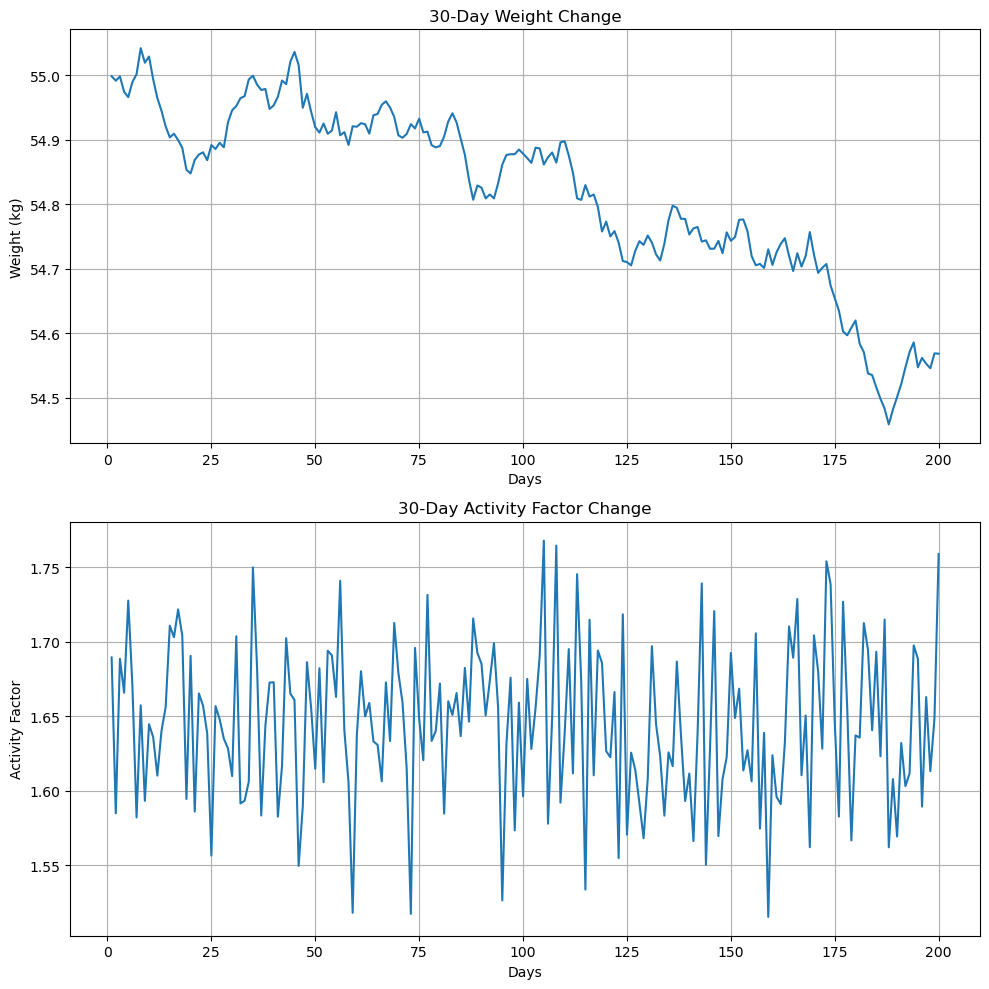

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

class Person:
    def __init__(self, age, gender, weight, height):
        self.age = age
        self.gender = gender
        self.weight = weight  # kg
        self.height = height  # cm
        self.bmr = self.calculate_bmr()

    def calculate_bmr(self):
        # BMR calculation adjusted for Japanese population (based on MHLW formula)
        if self.gender == 'male':
            return (0.0481 * self.weight + 0.0234 * self.height - 0.0138 * self.age - 0.4235) * 1000 / 4.186
        else:
            return (0.0481 * self.weight + 0.0234 * self.height - 0.0138 * self.age - 0.9708) * 1000 / 4.186

    def calculate_activity_factor(self, steps, sports_duration, sports_intensity):
        # Calculate activity factor based on steps (minimum 1.45, 1.70 at 7500 steps)
        steps_factor = 1.45 + (steps / 7500) * 0.25
        steps_factor = min(steps_factor, 2.0)  # Cap at 2.0

        # Calculate additional factor from sports activity
        sports_intensity_factors = {'none': 0, 'light': 0.1, 'moderate': 0.2, 'vigorous': 0.3}
        sports_factor = (sports_duration / 60) * sports_intensity_factors[sports_intensity]

        # Combine steps and sports factors
        activity_factor = steps_factor + sports_factor

        # Cap the activity factor at 2.3
        return min(activity_factor, 2.3)

    def calculate_tdee(self, steps, sports_duration, sports_intensity):
        activity_factor = self.calculate_activity_factor(steps, sports_duration, sports_intensity)
        return self.bmr * activity_factor

    def simulate_day(self, calorie_intake, steps, sports_duration, sports_intensity):
        tdee = self.calculate_tdee(steps, sports_duration, sports_intensity)
        calorie_balance = calorie_intake - tdee
        weight_change = calorie_balance / 7700  # Approx. 7700 calories = 1kg
        self.weight += weight_change
        activity_factor = self.calculate_activity_factor(steps, sports_duration, sports_intensity)
        return calorie_balance, weight_change, tdee, activity_factor

def run_simulation(person, days, avg_calorie_intake, calorie_variance, 
                   avg_steps, steps_variance, 
                   avg_sports_duration, sports_duration_variance, sports_intensity):
    results = []
    for day in range(days):
        actual_intake = random.gauss(avg_calorie_intake, calorie_variance)
        actual_steps = max(0, int(random.gauss(avg_steps, steps_variance)))
        actual_sports_duration = max(0, random.gauss(avg_sports_duration, sports_duration_variance))
        
        calorie_balance, weight_change, tdee, activity_factor = person.simulate_day(
            actual_intake, actual_steps, actual_sports_duration, sports_intensity)
        
        results.append({
            'day': day + 1,
            'weight': person.weight,
            'calorie_intake': actual_intake,
            'steps': actual_steps,
            'sports_duration': actual_sports_duration,
            'tdee': tdee,
            'calorie_balance': calorie_balance,
            'activity_factor': activity_factor
        })
    return results

# Simulation example
person = Person(age=30, gender='female', weight=55, height=160)
simulation_results = run_simulation(
    person, 
    days=200, 
    avg_calorie_intake=1950,  # Average calorie intake for Japanese women
    calorie_variance=150,
    avg_steps=5000,  # Average steps
    steps_variance=1500,
    avg_sports_duration=15,  # minutes
    sports_duration_variance=5,
    sports_intensity='light'
)

# Display results (first 5 days and last 5 days)
print("Simulation Results (Example: 30-year-old Japanese woman):")
for result in simulation_results[:5] + simulation_results[-5:]:
    print(f"Day {result['day']}: "
          f"Weight = {result['weight']:.2f} kg, "
          f"Calorie Intake = {result['calorie_intake']:.0f} kcal, "
          f"Steps = {result['steps']}, "
          f"Exercise Duration = {result['sports_duration']:.0f} min, "
          f"Activity Factor = {result['activity_factor']:.2f}, "
          f"TDEE = {result['tdee']:.0f} kcal, "
          f"Calorie Balance = {result['calorie_balance']:.0f} kcal")

# Plot graphs
days = [r['day'] for r in simulation_results]
weights = [r['weight'] for r in simulation_results]
activity_factors = [r['activity_factor'] for r in simulation_results]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(days, weights)
ax1.set_title("30-Day Weight Change")
ax1.set_xlabel("Days")
ax1.set_ylabel("Weight (kg)")
ax1.grid(True)

ax2.plot(days, activity_factors)
ax2.set_title("30-Day Activity Factor Change")
ax2.set_xlabel("Days")
ax2.set_ylabel("Activity Factor")
ax2.grid(True)

plt.tight_layout()
plt.show()

Simulating population: 100%|██████████| 100/100 [00:00<00:00, 9852.49it/s]

               day       weight  calorie_intake         steps  \
count  3000.000000  3000.000000     3000.000000   3000.000000   
mean     15.500000    60.325644     2075.075362   5089.190333   
std       8.656884     8.833238      259.874676   1796.907981   
min       1.000000    39.099086     1056.292955      0.000000   
25%       8.000000    53.541621     1903.862565   3908.500000   
50%      15.500000    60.176937     2077.876891   5109.000000   
75%      23.000000    67.326266     2258.050762   6275.000000   
max      30.000000    85.173459     2937.182369  10619.000000   

       sports_duration         tdee  calorie_balance  activity_factor  \
count      3000.000000  3000.000000      3000.000000      3000.000000   
mean         13.714656  2164.353087       -89.277725         1.635675   
std           6.744663   316.676454       312.337743         0.062645   
min           0.000000  1438.379471     -1094.314433         1.450000   
25%           8.935598  1907.012707      -302.722

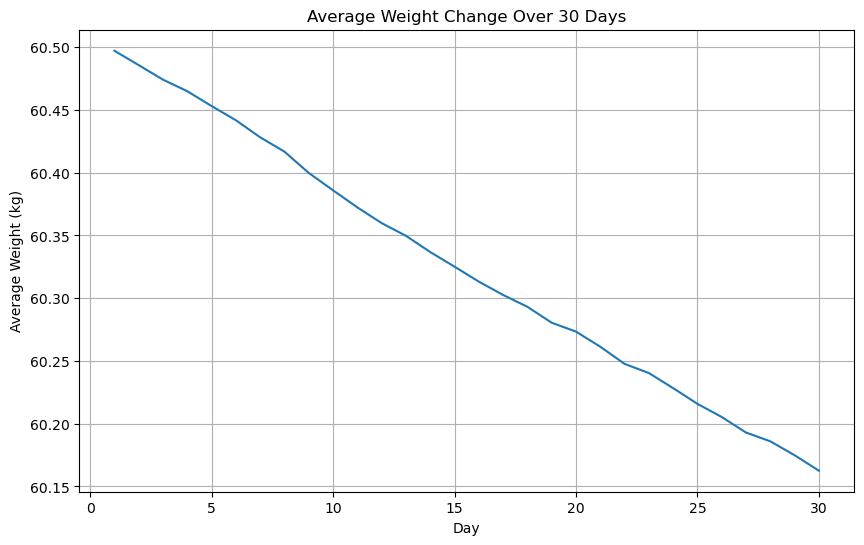

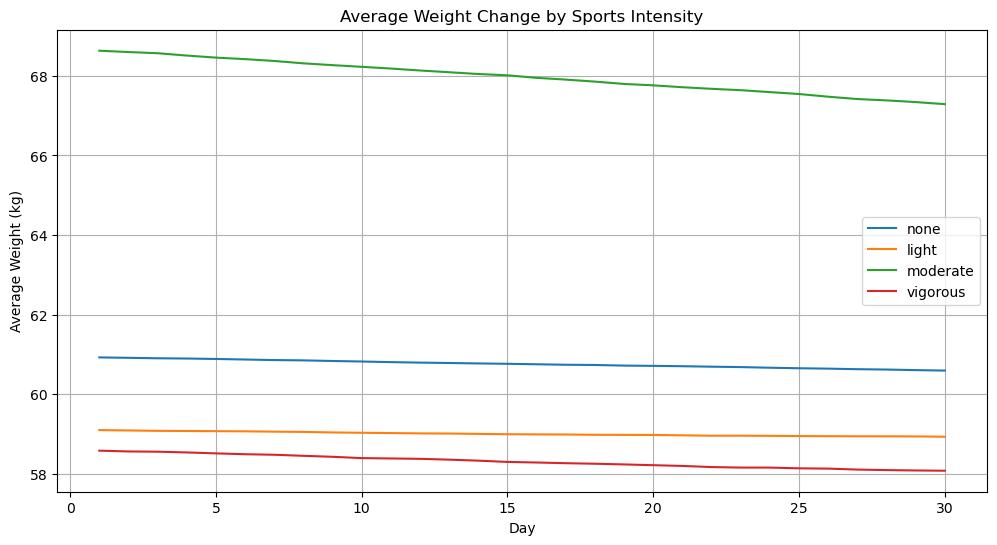

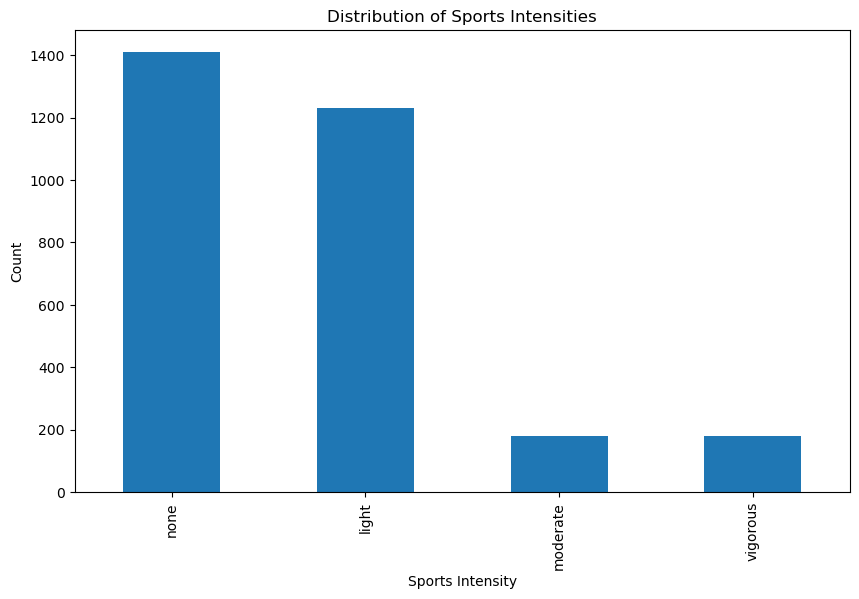

Sports Intensity Distribution:
sports_intensity
none        47.0
light       41.0
moderate     6.0
vigorous     6.0
Name: count, dtype: float64


In [2]:
# Personモデルからデータの生成を行うモデル
# 前述のPerson classとrun_simulationの定義はここに含まれると仮定します

def generate_population_data(n_people=100, days=30):
    population_data = []
    
    # 運動強度の選択確率を設定
    sports_intensity_choices = ['none', 'light', 'moderate', 'vigorous']
    sports_intensity_probabilities = [0.50, 0.35, 0.10, 0.05]
    
    for _ in tqdm(range(n_people), desc="Simulating population"):
        # Generate random person attributes
        age = random.randint(20, 60)
        gender = random.choice(['male', 'female'])
        weight = random.gauss(65 if gender == 'male' else 55, 7)
        height = random.gauss(170 if gender == 'male' else 160, 5)
        
        person = Person(age, gender, weight, height)
        
        # Generate random simulation parameters
        avg_calorie_intake = random.gauss(2200 if gender == 'male' else 1950, 150)
        avg_steps = random.gauss(5000, 1000)
        avg_sports_duration = random.gauss(15, 5)
        
        # 確率に基づいて運動強度を選択
        sports_intensity = np.random.choice(sports_intensity_choices, p=sports_intensity_probabilities)
        
        # Run simulation for this person
        results = run_simulation(
            person, 
            days=days,
            avg_calorie_intake=avg_calorie_intake,
            calorie_variance=150,
            avg_steps=avg_steps,
            steps_variance=1500,
            avg_sports_duration=avg_sports_duration,
            sports_duration_variance=5,
            sports_intensity=sports_intensity
        )
        
        # Add person attributes and sports_intensity to each day's results
        for result in results:
            result['person_id'] = _
            result['age'] = age
            result['gender'] = gender
            result['height'] = height
            result['initial_weight'] = weight
            result['sports_intensity'] = sports_intensity
        
        population_data.extend(results)
    
    return pd.DataFrame(population_data)

# Generate data for 100 people over 30 days
df = generate_population_data(n_people=100, days=30)

# Display basic statistics
print(df.describe())

# Display the first few rows of the dataframe
print(df.head())

# Save the dataframe to a CSV file
# df.to_csv('weight_simulation_100_people_30_days.csv', index=False)

# Plot average weight change over time
plt.figure(figsize=(10, 6))
df.groupby('day')['weight'].mean().plot()
plt.title('Average Weight Change Over 30 Days')
plt.xlabel('Day')
plt.ylabel('Average Weight (kg)')
plt.grid(True)
plt.show()

# Additional visualization: Weight change by sports intensity
plt.figure(figsize=(12, 6))
for intensity in df['sports_intensity'].unique():
    subset = df[df['sports_intensity'] == intensity]
    avg_weights = subset.groupby('day')['weight'].mean()
    plt.plot(avg_weights.index, avg_weights.values, label=intensity)

plt.title('Average Weight Change by Sports Intensity')
plt.xlabel('Day')
plt.ylabel('Average Weight (kg)')
plt.legend()
plt.grid(True)
plt.show()

# Display distribution of sports intensities
sports_intensity_counts = df['sports_intensity'].value_counts()
plt.figure(figsize=(10, 6))
sports_intensity_counts.plot(kind='bar')
plt.title('Distribution of Sports Intensities')
plt.xlabel('Sports Intensity')
plt.ylabel('Count')
plt.show()

print("Sports Intensity Distribution:")
print(sports_intensity_counts / len(df) * 100)